In [1]:
from qiskit import BasicAer, execute
from qiskit.circuit.library import TwoLocal
import numpy as np
from sko.PSO import PSO

[TwoLocal](https://qiskit.org/documentation/stubs/qiskit.circuit.library.TwoLocal.html#qiskit.circuit.library.TwoLocal)是一个参数化电路模板。

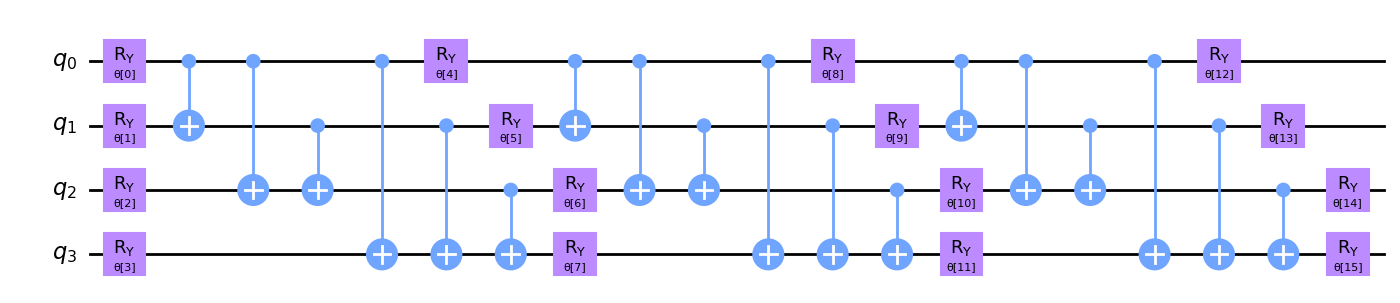

In [2]:
parameterized_qc = TwoLocal(4, "ry", "cx")
parameterized_qc.decompose().draw("mpl")

查看电路的参数对象。

In [3]:
parameterized_qc.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11]), ParameterVectorElement(θ[12]), ParameterVectorElement(θ[13]), ParameterVectorElement(θ[14]), ParameterVectorElement(θ[15])])

为参数对象指定值。

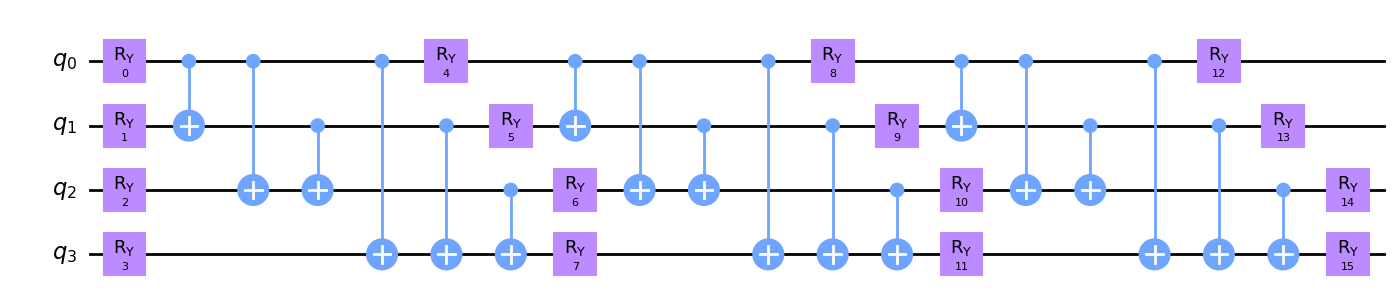

In [4]:
exact_qc = parameterized_qc.bind_parameters(
    list(range(parameterized_qc.num_parameters))
)
exact_qc.decompose().draw("mpl")

令 $x_i\in\{0,1\}$，求 $f(x_1,x_2,x_3,x_4)=x_1(x_2-3)(x_3-2)(x_4+1)$ 的最大值。用电路的测量值表示四个变量。

In [5]:
def f(x1, x2, x3, x4):
    return x1 * (x2 - 3) * (x3 - 2) * (x4 + 1)


def obj_func(params):
    exact_qc = parameterized_qc.bind_parameters(params)
    exact_qc.measure_all()
    counts = (
        execute(exact_qc, BasicAer.get_backend("qasm_simulator"), shots=1000)
        .result()
        .get_counts()
    )
    counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    return -f(*list(map(int, list(counts[0][0]))))

用PSO算法去优化参数。

In [6]:
pso = PSO(
    obj_func, parameterized_qc.num_parameters, pop=4, lb=-np.pi, ub=np.pi
)
print("iter\tgbest")
for i in range(20):
    pso.run(1)
    print(f"{i+1}\t{-pso.gbest_y}")

iter	gbest
1	[4.]
2	[4.]
3	[4.]
4	[6.]
5	[6.]
6	[6.]
7	[12.]
8	[12.]
9	[12.]
10	[12.]
11	[12.]
12	[12.]
13	[12.]
14	[12.]
15	[12.]
16	[12.]
17	[12.]
18	[12.]
19	[12.]
20	[12.]


In [7]:
-obj_func(pso.gbest_x)

12